In [1]:
import cv2
from ultralytics import YOLO
from pathlib import Path
import numpy as np

input_path = '/home/linux/coding/elc_activities/computer_vision/mixkit-ride-through-the-streets-of-london-4263-hd-ready.mp4'
model = YOLO('yolov8n.pt')
classnames = model.model.names if hasattr(model.model, 'names') else {i: str(i) for i in range(80)}

v = cv2.VideoCapture(input_path)
w = int(v.get(3))
h = int(v.get(4))
f = v.get(5)
video_name = Path(input_path).stem
writer = cv2.VideoWriter(video_name + '_finalcountout.avi', cv2.VideoWriter_fourcc(*'XVID'), f, (w, h))

while True:
    okay, frm = v.read()
    if not okay:
        break

    stuff = model(frm, verbose=False)
    bxs = stuff[0].boxes if stuff and stuff[0].boxes is not None else []

    count_lmv = 0
    count_hmv = 0

    for bx in bxs:
        c = int(bx.cls[0].item())
        n = classnames[c].lower().replace(' ', '').strip()

        if n in ['car', 'motorbike', 'scooter']:
            label = 'light motor vehicle'
            count_lmv += 1
        elif n in ['bus', 'truck']:
            label = 'heavy motor vehicle'
            count_hmv += 1
        else:
            continue

        co = bx.xyxy[0].cpu().numpy().astype(int)
        x1, y1, x2, y2 = co

        for i in range(x1, x2, 10):
            cv2.line(frm, (i, y1), (i + 5, y1), (255, 255, 255), 1)
            cv2.line(frm, (i, y2), (i + 5, y2), (255, 255, 255), 1)
        for j in range(y1, y2, 10):
            cv2.line(frm, (x1, j), (x1, j + 5), (255, 255, 255), 1)
            cv2.line(frm, (x2, j), (x2, j + 5), (255, 255, 255), 1)

        lx = x1
        ly = y1 - 20 if y1 - 20 > 0 else y1 + 5
        cv2.rectangle(frm, (lx, ly), (lx + 180, ly + 20), (0, 0, 0), -1)
        cv2.putText(frm, label, (lx + 5, ly + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # count label top-left
    cv2.rectangle(frm, (10, 10), (200, 65), (0, 0, 0), -1)
    cv2.putText(frm, f'lmv: {count_lmv}', (15, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.putText(frm, f'hmv: {count_hmv}', (15, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    writer.write(frm)
    cv2.imshow("counted_output", frm)
    import cv2
from ultralytics import YOLO
from pathlib import Path
import numpy as np

input_path = '/home/linux/coding/elc_activities/computer_vision/mixkit-ride-through-the-streets-of-london-4263-hd-ready.mp4'
model = YOLO('yolov8n.pt')
classnames = model.model.names if hasattr(model.model, 'names') else {i: str(i) for i in range(80)}

v = cv2.VideoCapture(input_path)
w = int(v.get(3))
h = int(v.get(4))
f = v.get(5)
video_name = Path(input_path).stem
writer = cv2.VideoWriter(video_name + '_finalcountout.avi', cv2.VideoWriter_fourcc(*'XVID'), f, (w, h))

while True:
    okay, frm = v.read()
    if not okay:
        break

    stuff = model(frm, verbose=False)
    bxs = stuff[0].boxes if stuff and stuff[0].boxes is not None else []

    count_lmv = 0
    count_hmv = 0

    for bx in bxs:
        c = int(bx.cls[0].item())
        n = classnames[c].lower().replace(' ', '').strip()

        if n in ['car', 'motorbike', 'scooter']:
            label = 'light motor vehicle'
            count_lmv += 1
        elif n in ['bus', 'truck']:
            label = 'heavy motor vehicle'
            count_hmv += 1
        else:
            continue

        co = bx.xyxy[0].cpu().numpy().astype(int)
        x1, y1, x2, y2 = co

        for i in range(x1, x2, 10):
            cv2.line(frm, (i, y1), (i + 5, y1), (255, 255, 255), 1)
            cv2.line(frm, (i, y2), (i + 5, y2), (255, 255, 255), 1)
        for j in range(y1, y2, 10):
            cv2.line(frm, (x1, j), (x1, j + 5), (255, 255, 255), 1)
            cv2.line(frm, (x2, j), (x2, j + 5), (255, 255, 255), 1)

        lx = x1
        ly = y1 - 20 if y1 - 20 > 0 else y1 + 5
        cv2.rectangle(frm, (lx, ly), (lx + 180, ly + 20), (0, 0, 0), -1)
        cv2.putText(frm, label, (lx + 5, ly + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # count label top-left
    cv2.rectangle(frm, (10, 10), (200, 65), (0, 0, 0), -1)
    cv2.putText(frm, f'lmv: {count_lmv}', (15, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.putText(frm, f'hmv: {count_hmv}', (15, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    writer.write(frm)
    cv2.imshow("counted_output", frm)
    if cv2.waitKey(1) == ord('q'):
        break

v.release()
writer.release()
cv2.destroyAllWindows()


v.release()
writer.release()
cv2.destroyAllWindows()


In [3]:
from ultralytics import YOLO
import cv2
import csv
from pathlib import Path
import glob
import time
import random

# CONFIG
MODEL_PATH = 'yolov8n.pt'
IMAGE_DIR = '/home/linux/coding/computer_vision/UA-DETRAC_UPD_ANN/images/train'  # <- your dataset
CSV_OUTPUT = 'uadetrac_train_sampled_counts.csv'
CONF_THRESHOLD = 0.3
RESIZE_SCALE = 0.75
TRACKER_CFG = 'bytetrack.yaml'
SAMPLE_PERCENTAGE = 0.10  # 10%

# Load YOLOv8 model
model = YOLO(MODEL_PATH)
CLASS_NAMES = model.model.names or {i: f'class_{i}' for i in range(model.model.model.nc)}
normalize_class = lambda name: name.lower().replace(" ", "").strip()
LMV_CLASSES = {'car', 'motorbike', 'motorcycle', 'auto', 'autorickshaw', 'scooter'}
HMV_CLASSES = {'bus', 'truck', 'tractor'}
LMV_IDS = {k for k, v in CLASS_NAMES.items() if normalize_class(v) in LMV_CLASSES}
HMV_IDS = {k for k, v in CLASS_NAMES.items() if normalize_class(v) in HMV_CLASSES}

# Get and sample image paths
image_paths = sorted(glob.glob(f'{IMAGE_DIR}/*.jpg'))
sample_size = max(1, int(len(image_paths) * SAMPLE_PERCENTAGE))
sampled_paths = random.sample(image_paths, sample_size)

# Prepare CSV output
Path(CSV_OUTPUT).unlink(missing_ok=True)
csv_file = open(CSV_OUTPUT, 'w', newline='')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Image Name', 'LMV Count', 'HMV Count'])

# Counting logic
def count_vehicles(boxes):
    lmv, hmv = 0, 0
    for box in boxes:
        cls_id = int(box.cls[0])
        if cls_id in LMV_IDS:
            lmv += 1
        elif cls_id in HMV_IDS:
            hmv += 1
    return lmv, hmv

# Process frame
def process_frame(img):
    h, w = int(img.shape[0] * RESIZE_SCALE), int(img.shape[1] * RESIZE_SCALE)
    resized = cv2.resize(img, (w, h))
    result = model.track(
        resized,
        tracker=TRACKER_CFG,
        persist=True,
        verbose=False,
        conf=CONF_THRESHOLD,
        iou=0.5
    )[0]
    return count_vehicles(result.boxes) if result and result.boxes is not None else (0, 0)

# Run inference on sampled images
start = time.time()
print(f"📦 Processing {sample_size} sampled images out of {len(image_paths)}...")

for img_path in sampled_paths:
    img = cv2.imread(img_path)
    if img is None:
        continue
    lmv, hmv = process_frame(img)
    csv_writer.writerow([Path(img_path).name, lmv, hmv])

csv_file.close()
print(f"\n✅ Done! Saved to: {CSV_OUTPUT}")
print(f"🕒 Time taken: {time.time() - start:.2f} sec")


📦 Processing 8379 sampled images out of 83791...

✅ Done! Saved to: uadetrac_train_sampled_counts.csv
🕒 Time taken: 371.40 sec


In [4]:
import pandas as pd

df = pd.read_csv('uadetrac_train_sampled_counts.csv')
df.head()


,Image Name,LMV Count,HMV Count
0,MVI_63544_img00659.jpg,6,0
1,MVI_40241_img01815.jpg,16,0
2,MVI_39771_img00372.jpg,6,1
3,MVI_20012_img00918.jpg,1,0
4,MVI_63521_img00207.jpg,6,1


In [5]:
print("Total Images Processed:", len(df))
print("Total LMVs Detected:", df['LMV Count'].sum())
print("Total HMVs Detected:", df['HMV Count'].sum())
print("Average LMVs per image:", df['LMV Count'].mean())
print("Average HMVs per image:", df['HMV Count'].mean())
print("Max LMV in an image:", df['LMV Count'].max())
print("Max HMV in an image:", df['HMV Count'].max())


Total Images Processed: 8379
Total LMVs Detected: 35122
Total HMVs Detected: 2498
Average LMVs per image: 4.191669650316267
Average HMVs per image: 0.29812626805108006
Max LMV in an image: 28
Max HMV in an image: 5


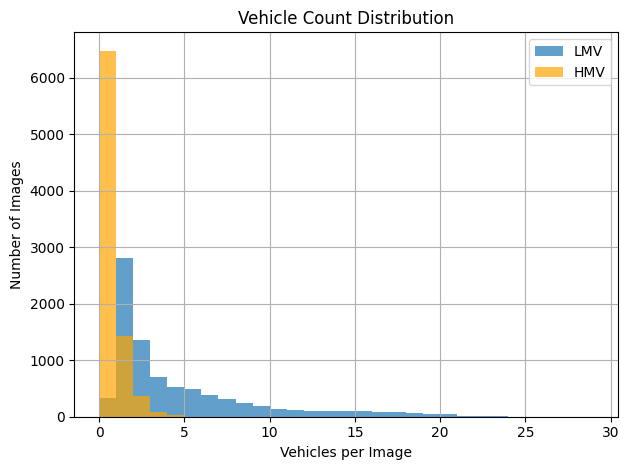

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['LMV Count'], bins=range(0, df['LMV Count'].max() + 2), alpha=0.7, label='LMV')
plt.hist(df['HMV Count'], bins=range(0, df['HMV Count'].max() + 2), alpha=0.7, label='HMV', color='orange')
plt.title('Vehicle Count Distribution')
plt.xlabel('Vehicles per Image')
plt.ylabel('Number of Images')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
df['Total'] = df['LMV Count'] + df['HMV Count']
top_5 = df.sort_values('Total', ascending=False).head(5)
print(top_5)


                  Image Name  LMV Count  HMV Count  Total
3513  MVI_20035_img00636.jpg         28          0     28
780   MVI_20035_img00397.jpg         25          0     25
7713  MVI_40192_img02074.jpg         25          0     25
3525  MVI_40191_img02371.jpg         24          1     25
3159  MVI_20035_img00420.jpg         24          0     24
